Rough mirror image of `../stats3d_eco.py` intended to facilitate visualisation of computed data over a single time step of the script, and to investigate more detailed relationships within the fields.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import gc
import sys
sys.path.insert(1, '/home/janssens/scripts/pp3d/')
from functions import *
from dataloader import DataLoaderDALES, DataLoaderDALESSeparate, DataLoaderMicroHH

In [2]:
mod = 'dales'
# lp = '/home/hp200321/data/botany-6-768/runs/Run_40'
lp = '/scratch-shared/janssens/eurec4a_mean_dales4.4'
itmin = 49
itmax = 50
di    = 1
izmin = 0
izmax = 75
store = False
pflag = False
eflag = False
mcrflag = False
radflag = False
moist_dry = 'median'
klp = 4

In [3]:
#%% Dry/moist regions

if mod == 'dales':
    dl = DataLoaderDALES(lp)
elif mod == 'dales_separate':
    dl = DataLoaderDALESSeparate(lp)
elif mod == 'microhh':
    dl = DataLoaderMicroHH(lp)
else:
    raise NotImplementedError("Set --mod option to either 'dales' or 'microhh'")
time = dl.time
zf = dl.zf
zh = dl.zh
xf = dl.xf
xh = dl.xh
yf = dl.yf
yh = dl.yh
time1d = dl.time1d
rhobf = dl.rhobf
rhobh = dl.rhobh
wfls = dl.wfls

# FIXME temporary hardcoding of dx/dy for data that does not have xf/yf as variables
dx = np.diff(xf)[0]
dy = np.diff(yf)[0] # Assumes uniform horizontal spacing

# Vertical differences
dzf = np.zeros(zh.shape)
dzf[:-1] = zh[1:] - zh[:-1] # First value is difference top 1st cell and surface
dzf[-1] = dzf[-2]

dzh = np.zeros(zf.shape)
dzh[1:] = zf[1:] - zf[:-1] # First value is difference mid 1st cell and mid 1st cell below ground
dzh[0] = 2*zf[1]

delta = (dx*dy*np.diff(zh))**(1./3)

plttime = np.arange(itmin, itmax, di)
zflim = zf[izmin:izmax]
zhlim = zh[izmin:izmax]

dzflim = dzf[izmin:izmax]
dzhlim = dzh[izmin:izmax]

qtpf_moist_time = np.zeros((plttime.size,izmax-izmin))
qtpf_dry_time = np.zeros((plttime.size,izmax-izmin))
qtpf_prod_moist_time = np.zeros((plttime.size,izmax-izmin-2))
qtpf_prod_dry_time = np.zeros((plttime.size,izmax-izmin-2))
qtpf_prod_moist_wex_time = np.zeros((plttime.size,izmax-izmin-2))
qtpf_prod_dry_wex_time = np.zeros((plttime.size,izmax-izmin-2))
qtpf_vdiv_moist_time = np.zeros((plttime.size,izmax-izmin-2))
qtpf_vdiv_dry_time = np.zeros((plttime.size,izmax-izmin-2))
qtpf_hdiv_moist_time = np.zeros((plttime.size,izmax-izmin-2))
qtpf_hdiv_dry_time = np.zeros((plttime.size,izmax-izmin-2))
qtpf_subs_moist_time = np.zeros((plttime.size,izmax-izmin-2))
qtpf_subs_dry_time = np.zeros((plttime.size,izmax-izmin-2))
qtpf_diff_moist_time = np.zeros((plttime.size,izmax-izmin-4))
qtpf_diff_dry_time = np.zeros((plttime.size,izmax-izmin-4))
qtpf_micr_moist_time = np.zeros((plttime.size,izmax-izmin))
qtpf_micr_dry_time = np.zeros((plttime.size,izmax-izmin))

thlvpf_moist_time = np.zeros((plttime.size,izmax-izmin))
thlvpf_dry_time = np.zeros((plttime.size,izmax-izmin))
thlvpf_prod_moist_time = np.zeros((plttime.size,izmax-izmin-2))
thlvpf_prod_dry_time = np.zeros((plttime.size,izmax-izmin-2))
thlvpf_vdiv_moist_time = np.zeros((plttime.size,izmax-izmin-2))
thlvpf_vdiv_dry_time = np.zeros((plttime.size,izmax-izmin-2))
thlvpf_hdiv_moist_time = np.zeros((plttime.size,izmax-izmin-2))
thlvpf_hdiv_dry_time = np.zeros((plttime.size,izmax-izmin-2))
thlvpf_subs_moist_time = np.zeros((plttime.size,izmax-izmin-2))
thlvpf_subs_dry_time = np.zeros((plttime.size,izmax-izmin-2))
thlvpf_diff_moist_time = np.zeros((plttime.size,izmax-izmin-4))
thlvpf_diff_dry_time = np.zeros((plttime.size,izmax-izmin-4))
thlvpf_radi_moist_time = np.zeros((plttime.size,izmax-izmin))
thlvpf_radi_dry_time = np.zeros((plttime.size,izmax-izmin))
thlvpf_micr_moist_time = np.zeros((plttime.size,izmax-izmin-2))
thlvpf_micr_dry_time = np.zeros((plttime.size,izmax-izmin-2))

thlvpp_moist_time = np.zeros((plttime.size,izmax-izmin))
thlvpp_dry_time = np.zeros((plttime.size,izmax-izmin))
thlvpp_prod_moist_time = np.zeros((plttime.size,izmax-izmin-2))
thlvpp_prod_dry_time = np.zeros((plttime.size,izmax-izmin-2))
thlvpp_vdiv_moist_time = np.zeros((plttime.size,izmax-izmin-2))
thlvpp_vdiv_dry_time = np.zeros((plttime.size,izmax-izmin-2))
thlvpp_hdiv_moist_time = np.zeros((plttime.size,izmax-izmin-2))
thlvpp_hdiv_dry_time = np.zeros((plttime.size,izmax-izmin-2))
thlvpp_subs_moist_time = np.zeros((plttime.size,izmax-izmin-2))
thlvpp_subs_dry_time = np.zeros((plttime.size,izmax-izmin-2))
thlvpp_diff_moist_time = np.zeros((plttime.size,izmax-izmin-4))
thlvpp_diff_dry_time = np.zeros((plttime.size,izmax-izmin-4))

qlpf_vdiv_moist_time = np.zeros((plttime.size,izmax-izmin-2))
qlpf_vdiv_dry_time = np.zeros((plttime.size,izmax-izmin-2))

wthlvpf_prod_moist_time = np.zeros((plttime.size,izmax-izmin-2))
wthlvpf_prod_dry_time = np.zeros((plttime.size,izmax-izmin-2))
wthlvpf_vdiv_moist_time = np.zeros((plttime.size,izmax-izmin-3))
wthlvpf_vdiv_dry_time = np.zeros((plttime.size,izmax-izmin-3))
wthlvpf_hdiv_moist_time = np.zeros((plttime.size,izmax-izmin-2))
wthlvpf_hdiv_dry_time = np.zeros((plttime.size,izmax-izmin-2))
wthlvpf_buoy_moist_time = np.zeros((plttime.size,izmax-izmin-2))
wthlvpf_buoy_dry_time = np.zeros((plttime.size,izmax-izmin-2))
wthlvpf_pres_moist_time = np.zeros((plttime.size,izmax-izmin-2))
wthlvpf_pres_dry_time = np.zeros((plttime.size,izmax-izmin-2))
wthlvpf_subs_moist_time = np.zeros((plttime.size,izmax-izmin-2))
wthlvpf_subs_dry_time = np.zeros((plttime.size,izmax-izmin-2))
wthlvpf_diff_moist_time = np.zeros((plttime.size,izmax-izmin-5))
wthlvpf_diff_dry_time = np.zeros((plttime.size,izmax-izmin-5))

thl_av_time = np.zeros((plttime.size,izmax-izmin))
qt_av_time = np.zeros((plttime.size,izmax-izmin))
thlv_av_time = np.zeros((plttime.size,izmax-izmin))

thlpf_moist_time = np.zeros((plttime.size,izmax-izmin))
thlpf_dry_time = np.zeros((plttime.size,izmax-izmin))
wff_moist_time = np.zeros((plttime.size,izmax-izmin))
wff_dry_time = np.zeros((plttime.size,izmax-izmin))
qlpf_moist_time = np.zeros((plttime.size,izmax-izmin))
qlpf_dry_time = np.zeros((plttime.size,izmax-izmin))

qtpp_moist_time = np.zeros((plttime.size,izmax-izmin))
qtpp_dry_time = np.zeros((plttime.size,izmax-izmin))
thlpp_moist_time = np.zeros((plttime.size,izmax-izmin))
thlpp_dry_time = np.zeros((plttime.size,izmax-izmin))
wfp_moist_time = np.zeros((plttime.size,izmax-izmin))
wfp_dry_time = np.zeros((plttime.size,izmax-izmin))
qlpp_moist_time = np.zeros((plttime.size,izmax-izmin))
qlpp_dry_time = np.zeros((plttime.size,izmax-izmin))

wthlp_av_time = np.zeros((plttime.size,izmax-izmin))
wthlpf_moist_time = np.zeros((plttime.size,izmax-izmin))
wthlpf_dry_time = np.zeros((plttime.size,izmax-izmin))

wqtp_av_time = np.zeros((plttime.size,izmax-izmin))
wqtpf_moist_time = np.zeros((plttime.size,izmax-izmin))
wqtpf_dry_time = np.zeros((plttime.size,izmax-izmin))

wqlp_av_time = np.zeros((plttime.size,izmax-izmin))
wqlpf_moist_time = np.zeros((plttime.size,izmax-izmin))
wqlpf_dry_time = np.zeros((plttime.size,izmax-izmin))
wqlpf_l_moist_time = np.zeros((plttime.size,izmax-izmin))
wqlpf_l_dry_time = np.zeros((plttime.size,izmax-izmin))
wqlpf_c_moist_time = np.zeros((plttime.size,izmax-izmin))
wqlpf_c_dry_time = np.zeros((plttime.size,izmax-izmin))
wqlpf_r_moist_time = np.zeros((plttime.size,izmax-izmin))
wqlpf_r_dry_time = np.zeros((plttime.size,izmax-izmin))

wthlvp_av_time = np.zeros((plttime.size,izmax-izmin))
wthlvpf_moist_time = np.zeros((plttime.size,izmax-izmin))
wthlvpf_dry_time = np.zeros((plttime.size,izmax-izmin))
wthlvpf_l_moist_time = np.zeros((plttime.size,izmax-izmin))
wthlvpf_l_dry_time = np.zeros((plttime.size,izmax-izmin))
wthlvpf_c_moist_time = np.zeros((plttime.size,izmax-izmin))
wthlvpf_c_dry_time = np.zeros((plttime.size,izmax-izmin))
wthlvpf_r_moist_time = np.zeros((plttime.size,izmax-izmin))
wthlvpf_r_dry_time = np.zeros((plttime.size,izmax-izmin))
wthlvpp_moist_time = np.zeros((plttime.size,izmax-izmin))
wthlvpp_dry_time = np.zeros((plttime.size,izmax-izmin))

# Mask for low-[ass filtering FIXME also hardcoded for now
circ_mask = np.zeros((xf.size,xf.size))
rad = getRad(circ_mask)
circ_mask[rad<=klp] = 1


print('Will compute for times:', time[plttime])

Initialising dataloader...
Set paths to all datasets and extracted dimensions
Will compute for times: [12.5]


In [4]:
for i in range(len(plttime)):
    print('Processing time step', i+1, '/', len(plttime))
    
    it1d = np.argmin(np.abs(time1d/3600 - time[plttime[i]]))
    
    # 1D fields
    rhobfi = rhobf[it1d,izmin:izmax]
    rhobhi = rhobh[it1d,izmin:izmax]
    
    # 3D fields
    qt = dl.load_qt(plttime[i], izmin, izmax)
    wh = dl.load_wh(plttime[i], izmin, izmax)
    thlp = dl.load_thl(plttime[i], izmin, izmax)
    qlp = dl.load_ql(plttime[i], izmin, izmax)
    u = dl.load_u(plttime[i], izmin, izmax)
    v = dl.load_v(plttime[i], izmin, izmax)
    if eflag:
        e12 = dl.load_e12(plttime[i], izmin, izmax)
    if pflag:
        pp = dl.load_p(plttime[i], izmin, izmax)

    # Slab averaging
    thl_av = np.mean(thlp,axis=(1,2))
    qt_av = np.mean(qt,axis=(1,2))   
    ql_av = np.mean(qlp,axis=(1,2))
    thlv_av = thl_av*(1+0.608*qt_av)
    
    thl_av_time[i,:] = thl_av
    qt_av_time[i,:] = qt_av
    thlv_av_time[i,:] = thlv_av
    
    # -> need presf for thv_av, taken from nearest 1d data time and half-level
    presh  = dl.load_presh(it1d, izmin, izmax)
    # presh  = np.ma.getdata(ds1.variables['presh'][it1d,izmin:izmax])
    presf  = (presh[1:]+presh[:-1])*0.5
    exnf   = (presf/1e5)**(Rd/cp)
    thv    = ((thlp[:-1,:,:] + (Lv/cp)*qlp[:-1,:,:]/exnf[:,np.newaxis,np.newaxis])
              *(1.+(Rv/Rd-1)*qt[:-1,:,:] -Rv/Rd*qlp[:-1,:,:]))
    thv_av = np.mean(thv,axis=(1,2))
    
    # Eddy diffusivities
    if eflag:
        dthvdz = compute_dthvdz(thlp, qt, qlp, exnf, dzhlim)
        ekmp,ekhp = compute_ek(e12, dthvdz, thv_av, delta[izmin:izmax-1])
        ekm_av = np.mean(ekmp,axis=(1,2))
        ekh_av = np.mean(ekhp,axis=(1,2))
        ekmp = ekmp - ekm_av[:,np.newaxis,np.newaxis]
        ekhp = ekhp - ekh_av[:,np.newaxis,np.newaxis]
        del e12
        del dthvdz
    
    # Define thlv
    thlvp = thlp + 0.608*thl_av[:,np.newaxis,np.newaxis]*qt
    
    # Perturbations
    qtp = qt - qt_av[:,np.newaxis,np.newaxis]
    twp = np.trapz(rhobfi[:,np.newaxis,np.newaxis]*qt[:,:,:],zflim,axis=0)
    del qt
    
    gc.collect()
    
    wf = (wh[1:,:,:] + wh[:-1,:,:])*0.5
    wh = wh[:-1,:,:]

    thlp = thlp - thl_av[:,np.newaxis,np.newaxis]
    thlvp = thlvp - thlv_av[:,np.newaxis,np.newaxis]
    qlp = qlp - ql_av[:,np.newaxis,np.newaxis]
    
    # Slab average resolved fluxes
    wqt_av = np.mean(wf*qtp,axis=(1,2))
    wthl_av = np.mean(wf*thlp,axis=(1,2))
    # wql_av = np.mean(wf*qlp,axis=(1,2))
 
    # Low-pass filter (and identify high-pass filtered remainder)    
    qtpf = lowPass(qtp, circ_mask)
    qtpp = qtp - qtpf
    del qtp
    
    whf = lowPass(wh, circ_mask)
    whp = wh - whf
    del wh
    
    wff = lowPass(wf, circ_mask)
    wfp = wf - wff
    del wf
            
    thlpf = lowPass(thlp, circ_mask)
    thlpp = thlp - thlpf
    del thlp
    
    thlvpf = lowPass(thlvp, circ_mask)
    thlvpp = thlvp - thlvpf
    del thlvp
    
    qlpf = lowPass(qlp, circ_mask)
    qlpp = qlp - qlpf
    del qlp

    gc.collect()
    

    # Moist/dry averaging, over the large/small scales
    twp = lowPass(twp, circ_mask)
    mask_moist = np.zeros(twp.shape)
    
    if moist_dry == 'mean':
        mask_moist[twp - np.mean(twp) > 0] = 1
        mask_dry = 1 - mask_moist
    elif moist_dry == 'median':
        mask_moist[twp - np.median(twp) > 0] = 1
        mask_dry = 1 - mask_moist
    
    # Moist, large
    thlpf_moist = mean_mask(thlpf,mask_moist)
    qtpf_moist = mean_mask(qtpf,mask_moist)
    wf_moist = mean_mask(wff,mask_moist)
    # w_moist_h = mean_mask(whf,mask_moist)
    qlpf_moist = mean_mask(qlpf,mask_moist)
    
    # Dry, large
    thlpf_dry = mean_mask(thlpf,mask_dry)
    qtpf_dry = mean_mask(qtpf,mask_dry)
    wf_dry = mean_mask(wff,mask_dry)
    qlpf_dry = mean_mask(qlpf,mask_dry)
    
    # Moist, small
    thlpp_moist = mean_mask(thlpp,mask_moist)
    qtpp_moist = mean_mask(qtpp,mask_moist)
    wp_moist = mean_mask(wfp,mask_moist)
    # w_moist_h = mean_mask(whf,mask_moist)
    qlpp_moist = mean_mask(qlpp,mask_moist)
    
    # Dry, small
    thlpp_dry = mean_mask(thlpp,mask_dry)
    qtpp_dry = mean_mask(qtpp,mask_dry)
    wp_dry = mean_mask(wfp,mask_dry)
    qlpp_dry = mean_mask(qlpp,mask_dry)

    # Store per variable
    thlpf_moist_time[i,:] = thlpf_moist
    thlpf_dry_time[i,:] = thlpf_dry
    thlpp_moist_time[i,:] = thlpp_moist
    thlpp_dry_time[i,:] = thlpp_dry

    qtpf_moist_time[i,:] = qtpf_moist
    qtpf_dry_time[i,:] = qtpf_dry
    qtpp_moist_time[i,:] = qtpp_moist
    qtpp_dry_time[i,:] = qtpp_dry

    thlvpf_moist_time[i,:] = thlpf_moist + 0.608*thl_av*qtpf_moist
    thlvpf_dry_time[i,:] = thlpf_dry + 0.608*thl_av*qtpf_dry
    thlvpp_moist_time[i,:] = thlpp_moist + 0.608*thl_av*qtpp_moist
    thlvpp_dry_time[i,:] = thlpp_dry + 0.608*thl_av*qtpp_dry

    wff_moist_time[i,:] = wf_moist
    wff_dry_time[i,:] = wf_dry
    wfp_moist_time[i,:] = wp_moist
    wfp_dry_time[i,:] = wp_dry
    
    qlpf_moist_time[i,:] = qlpf_moist
    qlpf_dry_time[i,:] = qlpf_dry
    qlpp_moist_time[i,:] = qlpp_moist
    qlpp_dry_time[i,:] = qlpp_dry
    
    ## Fluxes 
    # FIXME no sgs here yet!!
    wthlpf = lowPass((wff+wfp)*(thlpf+thlpp), circ_mask)
    wqtpf = lowPass((wff+wfp)*(qtpf+qtpp), circ_mask)
    wqlpf = lowPass((wff+wfp)*(qlpf+qlpp), circ_mask)

    wthlp_av = np.mean((wff+wfp)*(thlpf+thlpp),axis=(1,2))
    wthlpf_moist = mean_mask(wthlpf, mask_moist)
    wthlpf_dry = mean_mask(wthlpf, mask_dry)

    wqtp_av = np.mean((wff+wfp)*(qtpf+qtpp),axis=(1,2))    
    wqtpf_moist = mean_mask(wqtpf, mask_moist)
    wqtpf_dry = mean_mask(wqtpf, mask_dry)
    
    wqlp_av = np.mean((wff+wfp)*(qlpf+qlpp),axis=(1,2))
    wqlpf_moist = mean_mask(wqlpf, mask_moist)
    wqlpf_dry = mean_mask(wqlpf, mask_dry)

    wthlvp = (wff+wfp)*((thlpf+thlpp) + 0.608*thl_av[:,np.newaxis,np.newaxis]*(qtpf+qtpp))
    wthlvp_av = np.mean(wthlvp,axis=(1,2))
    wthlvpp = wthlvp - (wthlpf + 0.608*thl_av[:,np.newaxis,np.newaxis]*wqtpf) + wthlvp_av[:,np.newaxis,np.newaxis]

    wthlvpf_moist = wthlpf_moist + 0.608*thl_av*wqtpf_moist
    wthlvpf_dry = wthlpf_dry + 0.608*thl_av*wqtpf_dry

    wthlvpp_moist = mean_mask(wthlvpp, mask_moist)
    wthlvpp_dry = mean_mask(wthlvpp, mask_dry)
    
    # Scale decompose wthlvf and wql contributions FIXME need to make Galilean invariant
    wthlvpf_l, wthlvpf_c, wthlvpf_r = scaleDecomposeFlux(wff , wfp, thlvpf, thlvpp, circ_mask)
    wqlpf_l, wqlpf_c, wqlpf_r = scaleDecomposeFlux(wff , wfp, qlpf, qlpp, circ_mask)
    
    wthlvpf_l_moist_time[i,:] = mean_mask(wthlvpf_l, mask_moist)
    wthlvpf_l_dry_time[i,:] = mean_mask(wthlvpf_l, mask_dry)
    wthlvpf_c_moist_time[i,:] = mean_mask(wthlvpf_c, mask_moist)
    wthlvpf_c_dry_time[i,:] = mean_mask(wthlvpf_c, mask_dry)
    wthlvpf_r_moist_time[i,:] = mean_mask(wthlvpf_r, mask_moist)
    wthlvpf_r_dry_time[i,:] = mean_mask(wthlvpf_r, mask_dry)
    
    wqlpf_l_moist_time[i,:] = mean_mask(wqlpf_l, mask_moist)
    wqlpf_l_dry_time[i,:] = mean_mask(wqlpf_l, mask_dry)
    wqlpf_c_moist_time[i,:] = mean_mask(wqlpf_c, mask_moist)
    wqlpf_c_dry_time[i,:] = mean_mask(wqlpf_c, mask_dry)
    wqlpf_r_moist_time[i,:] = mean_mask(wqlpf_r, mask_moist)
    wqlpf_r_dry_time[i,:] = mean_mask(wqlpf_r, mask_dry)
    
    wthlp_av_time[i,:] = wthlp_av
    wthlpf_moist_time[i,:] = wthlpf_moist
    wthlpf_dry_time[i,:] = wthlpf_dry
    
    wqtp_av_time[i,:] = wqtp_av
    wqtpf_moist_time[i,:] = wqtpf_moist
    wqtpf_dry_time[i,:] = wqtpf_dry
    
    wqlp_av_time[i,:] = wqlp_av
    wqlpf_moist_time[i,:] = wqlpf_moist
    wqlpf_dry_time[i,:] = wqlpf_dry
    
    wthlvp_av_time[i,:] = wthlvp_av
    wthlvpf_moist_time[i,:] = wthlvpf_moist
    wthlvpf_dry_time[i,:] = wthlvpf_dry
    wthlvpp_moist_time[i,:] = wthlvpp_moist
    wthlvpp_dry_time[i,:] = wthlvpp_dry
    
    
    del wthlpf
    del wqtpf
    del wqlpf, wqlpf_l, wqlpf_c, wqlpf_r
    del wthlvp
    del wthlvpp
    gc.collect()
        
    ## BUDGET TERMS
    
    # Gradient production
    
    # Mean gradients
    Gamma_thl = (thl_av[1:] - thl_av[:-1])/(zflim[1:] - zflim[:-1])
    Gamma_qt = (qt_av[1:] - qt_av[:-1])/(zflim[1:] - zflim[:-1])
    # Gamma_ql = (ql_av[1:] - ql_av[:-1])/(zflim[1:] - zflim[:-1])
    Gamma_thlv = (thlv_av[1:] - thlv_av[:-1])/(zflim[1:] - zflim[:-1])
    
    Gamma_thl_f = (Gamma_thl[1:] + Gamma_thl[:-1])*0.5
    Gamma_qt_f = (Gamma_qt[1:] + Gamma_qt[:-1])*0.5
    # Gamma_ql_f = (Gamma_ql[1:] + Gamma_ql[:-1])*0.5
    Gamma_thlv_f = (Gamma_thlv[1:] + Gamma_thlv[:-1])*0.5
    
    # Large-scale thlv production
    thlvpf_prod_moist = wf_moist[1:-1]*Gamma_thlv_f
    thlvpf_prod_dry = wf_dry[1:-1]*Gamma_thlv_f
    
    thlvpf_prod_moist_time[i,:] = thlvpf_prod_moist
    thlvpf_prod_dry_time[i,:] = thlvpf_prod_dry
    
    # Small-scale
    thlvpp_prod_moist = wp_moist[1:-1]*Gamma_thlv_f
    thlvpp_prod_dry = wp_dry[1:-1]*Gamma_thlv_f
    
    thlvpp_prod_moist_time[i,:] = thlvpp_prod_moist
    thlvpp_prod_dry_time[i,:] = thlvpp_prod_dry
    
    # Moisture production term with actual w'
    qtpf_prod_wex_moist = wf_moist[1:-1]*Gamma_qt_f
    qtpf_prod_wex_dry = wf_dry[1:-1]*Gamma_qt_f

    qtpf_prod_moist_wex_time[i,:] = qtpf_prod_wex_moist
    qtpf_prod_dry_wex_time[i,:] = qtpf_prod_wex_dry
    
    # wthlv:
    # Doesn't matter if you use wfp instead of wfp+wff, neither in *_av nor *f
    # Doesn't matter if you use filtered wthlvpf_prod to calculate *_av instead of full wthlvpf_prod
    wthlvpf_prod = lowPass(wfp**2,circ_mask)[1:-1]*Gamma_thlv_f[:,np.newaxis,np.newaxis]
    wthlvp_prod_av = np.mean((wfp**2)[1:-1]*Gamma_thlv_f[:,np.newaxis,np.newaxis],axis=(1,2))
    wthlvpf_prod_moist_time[i,:] = mean_mask(wthlvpf_prod, mask_moist) - wthlvp_prod_av
    wthlvpf_prod_dry_time[i,:] = mean_mask(wthlvpf_prod, mask_dry) - wthlvp_prod_av
    
    del wthlvpf_prod
    gc.collect()
    
    # Reynolds vertical flux divergence anomaly (with second order scheme)
    
    # thlv
    div_wthlv_r = ddzwx_2nd(whp, thlvpp, dzflim, dzhlim, rhobf=rhobfi)
    div_wthlv_av = np.mean(ddzwx_2nd(whf+whp, thlvpf+thlvpp, dzflim, dzhlim, rhobf=rhobfi),axis=(1,2))
    div_wthlv_rf = lowPass(div_wthlv_r, circ_mask)
    div_wthlv_rp = div_wthlv_r - div_wthlv_rf # Since div_wthlv_rf still includes the mean flux, this is already the anomalous p-scale flux

    # Moist/dry and large/small scale
    div_wthlv_rf_moist = mean_mask(div_wthlv_rf, mask_moist)
    div_wthlv_rf_dry = mean_mask(div_wthlv_rf, mask_dry)
    div_wthlv_rp_moist = mean_mask(div_wthlv_rp, mask_moist)
    div_wthlv_rp_dry = mean_mask(div_wthlv_rp, mask_dry)
    
    thlvpf_vdiv_moist_time[i,:] = div_wthlv_rf_moist - div_wthlv_av
    thlvpf_vdiv_dry_time[i,:] = div_wthlv_rf_dry - div_wthlv_av
    thlvpp_vdiv_moist_time[i,:] = div_wthlv_rp_moist
    thlvpp_vdiv_dry_time[i,:] = div_wthlv_rp_dry
    
    # wthlvp
    # Valid approximations that allow bypassing high-pass filtering the div-terms:
    #  - lowPass(wfp[1:-1,:,:]*div_wthlv_r) \approx lowPass(wfp[1:-1,:,:]*div_wthlv)
    #  - lowPass(thlvpp[1:-2,:,:]*div_ww_r) \approx lowPass(thlvpp[1:-2,:,:]*div_ww)
    # Though this introduces small errors
    wdiv_wthlvf_r = lowPass(wfp[1:-1,:,:]*div_wthlv_r,circ_mask)
    # wdiv_wthlv_av = lowPass(wfp[1:-1,:,:]*div_wthlv_av[:,np.newaxis,np.newaxis],circ_mask) # <-- basically zero
    wdiv_wthlv_av = np.mean(wfp[1:-1,:,:]*div_wthlv_r,axis=(1,2))

    div_ww_r = ddzww_2nd(whp, dzhlim, rhobf=rhobfi, rhobh=rhobhi) # At half levels
    div_ww_r = (div_ww_r[1:,:,:] + div_ww_r[:-1,:,:])*0.5 # At full levels zflim[1:-2]
    
    thlvpdiv_wwf_r = lowPass(thlvpp[1:-2,:,:]*div_ww_r,circ_mask)
    thlvpdiv_ww_av = np.mean(thlvpp[1:-2,:,:]*div_ww_r,axis=(1,2))
    
    wthlvpf_vdiv_moist_time[i,:] = (mean_mask(wdiv_wthlvf_r[:-1,:,:]+thlvpdiv_wwf_r, mask_moist) - 
                               (wdiv_wthlv_av[:-1]+thlvpdiv_ww_av))
    wthlvpf_vdiv_dry_time[i,:] = (mean_mask(wdiv_wthlvf_r[:-1,:,:]+thlvpdiv_wwf_r, mask_dry) - 
                               (wdiv_wthlv_av[:-1]+thlvpdiv_ww_av))
    
    # qt
    div_wqt_r = ddzwx_2nd(whp, qtpp, dzflim, dzhlim, rhobf=rhobfi)
    div_wqt_av = np.mean(ddzwx_2nd(whf+whp, qtpf+qtpp, dzflim, dzhlim, rhobf=rhobfi),axis=(1,2))
    div_wqt_rf = lowPass(div_wqt_r, circ_mask)
    
    div_wqt_rf_moist = mean_mask(div_wqt_rf,mask_moist)
    div_wqt_rf_dry = mean_mask(div_wqt_rf,mask_dry)
    
    qtpf_vdiv_moist_time[i,:] = div_wqt_rf_moist - div_wqt_av
    qtpf_vdiv_dry_time[i,:] = div_wqt_rf_dry - div_wqt_av
    
    # ql
    div_wql = ddzwx_2nd(whp, qlpf+qlpp, dzflim, dzhlim, rhobf=rhobfi)
    div_wql_av = np.mean(div_wql,axis=(1,2))
    div_wqlf = lowPass(div_wql, circ_mask)
    
    div_wqlf_moist = mean_mask(div_wqlf,mask_moist)
    div_wqlf_dry = mean_mask(div_wqlf,mask_dry)
    
    qlpf_vdiv_moist_time[i,:] = div_wqlf_moist - div_wql_av
    qlpf_vdiv_dry_time[i,:] = div_wqlf_dry - div_wql_av

    del div_wthlv_rf
    del div_wthlv_rp    
    del wdiv_wthlvf_r
    del div_ww_r
    del thlvpdiv_wwf_r
    del div_wqt_r
    del div_wqt_rf
    del div_wql
    del div_wqlf
    gc.collect()

    # Moisture instability term model (WTG for thlv and qtpf model for flux anomaly div)
    w_mod = lowPass(np.abs(whp),circ_mask)
    div_wthlvfa_mod = ddzwx_2nd(w_mod, -0.608*thl_av[:,np.newaxis,np.newaxis]*qtpf, dzflim, dzhlim, rhobf=rhobfi)
    div_wthlvfa_mod_moist = mean_mask(div_wthlvfa_mod, mask_moist)
    div_wthlvfa_mod_dry = mean_mask(div_wthlvfa_mod, mask_dry)
    del w_mod
    del div_wthlvfa_mod
    gc.collect()

    qtpf_prod_moist = div_wthlvfa_mod_moist*Gamma_qt_f/Gamma_thlv_f
    qtpf_prod_dry = div_wthlvfa_mod_dry*Gamma_qt_f/Gamma_thlv_f
    
    # Model that just relies on the WTG
    # qtpf_prod_moist = (div_wthlv_r_moist - div_wthlv_av)*Gamma_qt_f/Gamma_thlv_f
    # qtpf_prod_dry = (div_wthlv_r_dry - div_wthlv_av)*Gamma_qt_f/Gamma_thlv_f
    
    qtpf_prod_moist_time[i,:] = qtpf_prod_moist
    qtpf_prod_dry_time[i,:] = qtpf_prod_dry

    # Horizontal advection

    # Horizontal thlv advection
    div_uhthlvp = ddxhuha_2nd(u, v, thlvpf+thlvpp, dx, dy)
    div_uhthlvpf = lowPass(div_uhthlvp, circ_mask)
    
    # moist/dry and large/small scale
    div_uhthlvpf_moist = mean_mask(div_uhthlvpf, mask_moist)
    div_uhthlvpf_dry = mean_mask(div_uhthlvpf, mask_dry)
    div_uhthlvpp_moist = mean_mask(div_uhthlvp - div_uhthlvpf, mask_moist)
    div_uhthlvpp_dry = mean_mask(div_uhthlvp - div_uhthlvpf, mask_dry)

    thlvpf_hdiv_moist_time[i,:] = div_uhthlvpf_moist[1:-1]
    thlvpf_hdiv_dry_time[i,:] = div_uhthlvpf_dry[1:-1]
    thlvpp_hdiv_moist_time[i,:] = div_uhthlvpp_moist[1:-1]
    thlvpp_hdiv_dry_time[i,:] = div_uhthlvpp_dry[1:-1]
    
    # wthlv
    # Valid approximations that allow bypassing high-pass filtering the div-terms:
    #  - lowPass(wfp*ddxhuha_2nd(u,v,thlvpp)) \approx lowPass(wfp*ddxhuha_2nd(u,v,thlvpf+thlvpp))
    #  - lowPass(thlvpp*ddxhuhw_2nd(u,v,whp)) \approx lowPass(thlvpp*ddxhuhw_2nd(u,v,whf+whp))
    
    wdiv_uhthlvp = wfp*ddxhuha_2nd(u, v, thlvpp, dx, dy)
    wdiv_uhthlvpf = lowPass(wdiv_uhthlvp, circ_mask)
    wdiv_uhthlvp_av = np.mean(wdiv_uhthlvpf, axis=(1,2))

    thlvpdiv_uhwp = ddxhuhw_2nd(u, v, whp, dx, dy) # half level 1 and up
    thlvpdiv_uhwp = (thlvpdiv_uhwp[1:,:,:] + thlvpdiv_uhwp[:-1,:,:]) * 0.5 # Interpolated to zflim[1:-1]
    thlvpdiv_uhwp = thlvpp[1:-1,:,:]*thlvpdiv_uhwp
    thlvpdiv_uhwpf = lowPass(thlvpdiv_uhwp, circ_mask)
    thlvpdiv_uhwp_av = np.mean(thlvpdiv_uhwp, axis=(1,2))

    wthlvpf_hdiv_moist_time[i,:] = (mean_mask(wdiv_uhthlvpf[1:-1,:,:] + thlvpdiv_uhwpf, mask_moist) -
                                   (wdiv_uhthlvp_av[1:-1] + thlvpdiv_uhwp_av))
    wthlvpf_hdiv_dry_time[i,:] = (mean_mask(wdiv_uhthlvpf[1:-1,:,:] + thlvpdiv_uhwpf, mask_dry) -
                                 (wdiv_uhthlvp_av[1:-1] + thlvpdiv_uhwp_av))

    # Horizontal moisture advection
    # intra-scale contribution largest, but entire term kept for now
    div_uhqtp = lowPass(ddxhuha_2nd(u, v, qtpf+qtpp, dx, dy), circ_mask)
    div_uhqtp_moist = mean_mask(div_uhqtp,mask_moist)
    div_uhqtp_dry = mean_mask(div_uhqtp,mask_dry)

    qtpf_hdiv_moist_time[i,:] = div_uhqtp_moist[1:-1]
    qtpf_hdiv_dry_time[i,:] = div_uhqtp_dry[1:-1]
    
    del div_uhthlvp
    del div_uhthlvpf
    del wdiv_uhthlvp
    del wdiv_uhthlvpf
    del thlvpdiv_uhwp
    del thlvpdiv_uhwpf
    del div_uhqtp
    gc.collect()

    # Subsidence warming
    # Defined from half level 1 on, used from full level 0 on (upwinding)
    wsubdthlvpdz = wsubdxdz(wfls[izmin:izmax],thlvpf+thlvpp, dzhlim)
    wsubdthlvpdzf = lowPass(wsubdthlvpdz, circ_mask)
    
    # moist/dry and large/small
    wsubdthlvpdzf_moist = mean_mask(wsubdthlvpdzf, mask_moist)
    wsubdthlvpdzf_dry = mean_mask(wsubdthlvpdzf, mask_dry)
    wsubdthlvpdzp_moist = mean_mask(wsubdthlvpdz - wsubdthlvpdzf, mask_moist)
    wsubdthlvpdzp_dry = mean_mask(wsubdthlvpdz - wsubdthlvpdzf, mask_dry)
    
    # Write from full level 1 on, to match other terms
    thlvpf_subs_moist_time[i,:] = wsubdthlvpdzf_moist[1:]
    thlvpf_subs_dry_time[i,:] = wsubdthlvpdzf_dry[1:]
    thlvpp_subs_moist_time[i,:] = wsubdthlvpdzp_moist[1:]
    thlvpp_subs_dry_time[i,:] = wsubdthlvpdzp_dry[1:]
    
    # wthlv 
    wwsubdthlvppdz = wfp[:-1,:,:]*wsubdxdz(wfls[izmin:izmax],thlvpp, dzhlim)
    wwsubdthlvppdz_av = np.mean(wwsubdthlvppdz,axis=(1,2))
    wwsubdthlvppdzf = lowPass(wwsubdthlvppdz, circ_mask)
    
    wwsubdthlvppdzf_moist = mean_mask(wwsubdthlvppdzf, mask_moist)
    wwsubdthlvppdzf_dry = mean_mask(wwsubdthlvppdzf, mask_dry)
    
    wthlvpf_subs_moist_time[i,:] = wwsubdthlvppdzf_moist[1:] - wwsubdthlvppdz_av[1:]
    wthlvpf_subs_dry_time[i,:] = wwsubdthlvppdzf_dry[1:] - wwsubdthlvppdz_av[1:]
    
    # Subsidence drying
    wsubdqtpdzf = lowPass(wsubdxdz(wfls[izmin:izmax], qtpf+qtpp, dzhlim),circ_mask)
    wsubdqtpdzf_moist = mean_mask(wsubdqtpdzf,mask_moist)
    wsubdqtpdzf_dry = mean_mask(wsubdqtpdzf,mask_dry)
    
    qtpf_subs_moist_time[i,:] = wsubdqtpdzf_moist[1:]
    qtpf_subs_dry_time[i,:] = wsubdqtpdzf_dry[1:]
    
    del wsubdthlvpdz
    del wsubdthlvpdzf
    del wwsubdthlvppdz
    del wwsubdthlvppdzf
    del wsubdqtpdzf
    gc.collect()
    
    # Buoyancy tendency in wthlvpf budget
    wthlvp_buoy = (thlvpp[:-1]*grav*(thv-thv_av[:,np.newaxis,np.newaxis])/thv_av[:,np.newaxis,np.newaxis])[1:,:,:]
    wthlvp_buoy_av = np.mean(wthlvp_buoy,axis=(1,2))
    wthlvp_buoy = lowPass(wthlvp_buoy, circ_mask)
    wthlvpf_buoy_moist_time[i,:] = mean_mask(wthlvp_buoy, mask_moist) - wthlvp_buoy_av
    wthlvpf_buoy_dry_time[i,:] = mean_mask(wthlvp_buoy, mask_dry) - wthlvp_buoy_av

    del wthlvp_buoy
    gc.collect()
    
    # SFS diffusion
    if eflag:
        # Heat
        diff_thlvp = (diffeka(ekhp+ekh_av[:,np.newaxis,np.newaxis], thlvpf+thlvpp, dx, dy, dzflim, dzhlim, rhobfi, rhobhi) +
                      diffzeka(ekhp, thlv_av[:,np.newaxis,np.newaxis], dzflim, dzhlim, rhobfi, rhobhi))
        diff_thlvpf = lowPass(diff_thlvp, circ_mask)

        diff_thlvp_av = np.mean(diffeka(ekhp, thlvpf+thlvpp, dx, dy, dzflim, dzhlim, rhobfi, rhobhi),axis=(1,2))                      

        # moist/dry and large/small
        diff_thlvpf_moist = mean_mask(diff_thlvpf, mask_moist)
        diff_thlvpf_dry = mean_mask(diff_thlvpf, mask_dry)
        diff_thlvpp_moist = mean_mask(diff_thlvp - diff_thlvpf, mask_moist)
        diff_thlvpp_dry = mean_mask(diff_thlvp - diff_thlvpf, mask_dry)

        thlvpf_diff_moist_time[i,:] = diff_thlvpf_moist - diff_thlvp_av
        thlvpf_diff_dry_time[i,:] = diff_thlvpf_dry - diff_thlvp_av
        thlvpp_diff_moist_time[i,:] = diff_thlvpp_moist - diff_thlvp_av
        thlvpp_diff_dry_time[i,:] = diff_thlvpp_dry - diff_thlvp_av
        
        # wthlv
        # Valid approximations that allow bypassing high-pass filtering the diff-terms:
        # - lowPass(wpp*diff_thlvp) \approx lowPass(wpp*(diff_thlvp-lowPass(diff_thlvp)))
        # - lowPass(thlvpp*diff_wp) \approx lowPass(thlvpp*(diff_wpp-lowPass(diff_wpp)))
        
        # Do not need to account for diff_thlvp_av or diff_wp_av
        wdiff_thlvpf = lowPass(wfp[2:-2,:,:]*diff_thlvp, circ_mask)
        wdiff_thlv_av = np.mean(wfp[2:-2,:,:]*diff_thlvp, axis=(1,2))

        thlvpdiffw = diffekw(ekmp+ekm_av[:,np.newaxis,np.newaxis],u,v,whp,dx,dy,dzflim,dzhlim,rhobfi,rhobhi)
        thlvpdiffw = thlvpp[2:-3]*(thlvpdiffw[1:,:,:] + thlvpdiffw[:-1,:,:])/2. # At zflim[2:-3]
        thlvpdiffwf = lowPass(thlvpdiffw, circ_mask)
        thlvpdiffw_av = np.mean(thlvpdiffw, axis=(1,2))

        wthlvpf_diff_moist_time[i,:] = (mean_mask(wdiff_thlvpf[:-1,:,:] + thlvpdiffwf, mask_moist) - 
                                        (wdiff_thlv_av[:-1] + thlvpdiffw_av))

        wthlvpf_diff_dry_time[i,:] = (mean_mask(wdiff_thlvpf[:-1,:,:] + thlvpdiffwf, mask_dry) - 
                                      (wdiff_thlv_av[:-1] + thlvpdiffw_av))

        # Moisture
        diff_qtpf = lowPass(diffeka(ekhp+ekh_av[:,np.newaxis,np.newaxis], qtpf+qtpp, dx, dy, dzflim, dzhlim, rhobfi, rhobhi)+
                            diffzeka(ekhp, qt_av[:,np.newaxis,np.newaxis], dzflim, dzhlim, rhobfi, rhobhi),
                            circ_mask)
        diff_qtp_av = np.mean(diffeka(ekhp, qtpf+qtpp, dx, dy, dzflim, dzhlim, rhobfi, rhobhi), axis=(1,2))
        
        diff_qtpf_moist = mean_mask(diff_qtpf,mask_moist)
        diff_qtpf_dry = mean_mask(diff_qtpf,mask_dry)

        qtpf_diff_moist_time[i,:] = diff_qtpf_moist - diff_qtp_av
        qtpf_diff_dry_time[i,:] = diff_qtpf_dry - diff_qtp_av

        del diff_thlvp
        del diff_thlvpf
        del wdiff_thlvpf
        del thlvpdiffw
        del thlvpdiffwf
        del diff_qtpf
        gc.collect()
    
    # Pressure fluctuation gradient (in wthlvp budget)
    if pflag:
        thlvppgrad = (pp[1:,:,:] - pp[:-1,:,:])/dzhlim[1:,np.newaxis,np.newaxis] # At half levels (as it appears in w eq)
        thlvppgrad = (thlvppgrad[1:,:,:] + thlvppgrad[:-1,:,:])*0.5 # Move to full levels
        thlvppgrad = thlvpp[1:-1,:,:]*thlvppgrad
        thlvppgrad_av = np.mean(thlvppgrad,axis=(1,2))
        thlvppgrad = lowPass(thlvppgrad, circ_mask)

        thlvppgradf_moist = mean_mask(thlvppgrad, mask_moist)
        thlvppgradf_dry = mean_mask(thlvppgrad, mask_dry)

        wthlvpf_pres_moist_time[i,:] = thlvppgradf_moist - thlvppgrad_av
        wthlvpf_pres_dry_time[i,:] = thlvppgradf_dry - thlvppgrad_av

        del thlvppgrad
        gc.collect()

    # Radiation impact in thlvp budget
    if radflag:
        Sthlrad = dl.load_rad(plttime[i], izmin, izmax)
        Sthlradpf = lowPass(Sthlrad - np.mean(Sthlrad,axis=(1,2))[:,np.newaxis,np.newaxis],
                            circ_mask)
        thlvpf_radi_moist_time[i,:] = mean_mask(Sthlradpf, mask_moist)
        thlvpf_radi_dry_time[i,:] = mean_mask(Sthlradpf, mask_dry)
        
        del Sthlradpf
        gc.collect()
    
    
    if mcrflag:
        Sqtmcr = dl.load_mcr(plttime[i], izmin, izmax)
        Sqtmcrpf = lowPass(Sqtmcr - np.mean(Sqtmcr,axis=(1,2))[:,np.newaxis,np.newaxis],
                            circ_mask)
        
        qtpf_micr_moist = mean_mask(Sqtmcrpf, mask_moist).data # needed to unmask
        qtpf_micr_dry = mean_mask(Sqtmcrpf, mask_dry).data
        
        qtpf_micr_moist_time[i,:] = qtpf_micr_moist
        qtpf_micr_dry_time[i,:] = qtpf_micr_dry
        
        cmcr = 0.608*thl_av[1:-1] - Lv/cp/exnf[:-1]
        
        thlvpf_micr_moist_time[i,:] = cmcr*qtpf_micr_moist[1:-1]
        thlvpf_micr_dry_time[i,:] = cmcr*qtpf_micr_dry[1:-1]
        
        del Sqtmcrpf
        gc.collect()

Processing time step 1 / 1


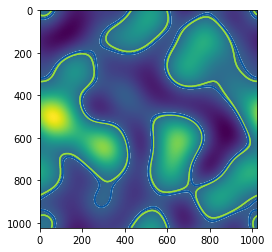

In [8]:
mask_moist_med = np.zeros(twp.shape)
mask_moist_med[twp - np.median(twp) > 0] = 1

plt.imshow(twp)
plt.contour(mask_moist)
plt.contour(mask_moist_med, cmap='Blues')

In [13]:
# qt
div_wqt_r = ddzwx_2nd(whf+whp, qtpf+qtpp, dzflim, dzhlim, rhobf=rhobfi)
div_wqt_av = np.mean(ddzwx_2nd(whf+whp, qtpf+qtpp, dzflim, dzhlim, rhobf=rhobfi),axis=(1,2))
div_wqt_rf = lowPass(div_wqt_r, circ_mask)

div_wqt_rf_moist = mean_mask(div_wqt_rf,mask_moist)
div_wqt_rf_dry = mean_mask(div_wqt_rf,mask_dry)

qtpf_vdiv_moist_time[i,:] = div_wqt_rf_moist - div_wqt_av
qtpf_vdiv_dry_time[i,:] = div_wqt_rf_dry - div_wqt_av

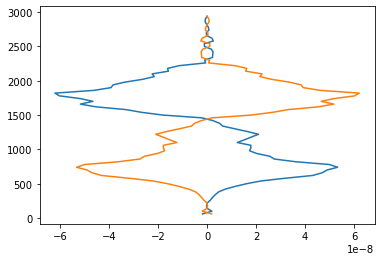

In [15]:
plt.plot(qtpf_vdiv_moist_time[0,:],zflim[1:-1])
plt.plot(qtpf_vdiv_dry_time[0,:],zflim[1:-1])

In [17]:
wqtpf_l, wqtpf_c, wqtpf_r = scaleDecomposeFlux(wff , wfp, qtpf, qtpp, circ_mask)
wqtpf_l_moist_time = mean_mask(wqtpf_l, mask_moist)
wqtpf_l_dry_time = mean_mask(wqtpf_l, mask_dry)
wqtpf_c_moist_time = mean_mask(wqtpf_c, mask_moist)
wqtpf_c_dry_time = mean_mask(wqtpf_c, mask_dry)
wqtpf_r_moist_time = mean_mask(wqtpf_r, mask_moist)
wqtpf_r_dry_time = mean_mask(wqtpf_r, mask_dry)
del wqtpf_l
del wqtpf_c
del wqtpf_r
gc.collect()

5362

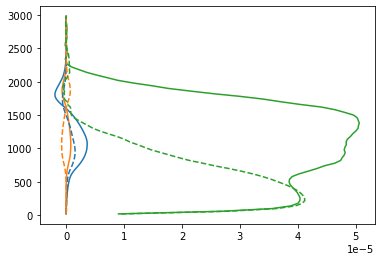

In [21]:
plt.plot(wqtpf_l_moist_time,zflim,c='C0')
plt.plot(wqtpf_c_moist_time,zflim,c='C1')
plt.plot(wqtpf_r_moist_time,zflim,c='C2')
plt.plot(wqtpf_l_dry_time,zflim,c='C0',linestyle='--')
plt.plot(wqtpf_c_dry_time,zflim,c='C1',linestyle='--')
plt.plot(wqtpf_r_dry_time,zflim,c='C2',linestyle='--')